<a href="https://colab.research.google.com/github/Tina-Mulu/Mchezopesa-football-predictionds/blob/main/Mchezopesa_football_predictions_IP_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1**. Defining the question**

a) **Specifying the Question**

As a data scientist you have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to come up with a prediction result of a game between team 1 and team 2, based on who's home and who's away , and on whether or not the game is friendly including erank in your training.


**b)Defining the Metrics for success**

using polynomial regression approach predict how many goals th hometeam scores and how many goals the away team scores.
using logistic regression approach predict the number of goals scored also

**c) Understanding the context**

A more detailed explanation and history of the rankings is available here: [Link] 

An explanation of the ranking procedure is available here: [Link]

**e) Data relevance**

Some features are available on the FIFA ranking page [Link].

**2. Reading the Data**

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv("fifa_ranking.csv")
df1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
df2 = pd.read_csv("results.csv")
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**3. Checking the data**

In [6]:
df1.shape

(41361, 16)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     13995 non-null  int64  
 1   country_full             13994 non-null  object 
 2   country_abrv             13994 non-null  object 
 3   total_points             13994 non-null  float64
 4   previous_points          13994 non-null  float64
 5   rank_change              13994 non-null  float64
 6   cur_year_avg             13994 non-null  float64
 7   cur_year_avg_weighted    13994 non-null  float64
 8   last_year_avg            13994 non-null  float64
 9   last_year_avg_weighted   13994 non-null  float64
 10  two_year_ago_avg         13994 non-null  float64
 11  two_year_ago_weighted    13994 non-null  float64
 12  three_year_ago_avg       13994 non-null  float64
 13  three_year_ago_weighted  13994 non-null  float64
 14  confederation         

In [7]:
df2.shape

(40839, 9)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


**4. External data source validation**

**Tidying the dataset**

In [9]:

df1.rename(columns= {'country_full':'country'}, inplace=True)

In [10]:
# dropping unnecessary columns
df1.drop(['country_abrv', 'previous_points', 'total_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg',
          'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 'confederation'], axis = 1, inplace=True)

In [11]:
# changing the date format
df1['rank_date'] =  pd.to_datetime(df1['rank_date'])

In [12]:
# stripping the month and year from the rank date
df1['rank_month'] = df1['rank_date'].dt.month
df1['rank_year'] = df1['rank_date'].dt.year

In [ ]:
df1.drop(['rank_date'], axis=1, inplace=True)
df1

,rank,country,rank_month,rank_year
0,1,Germany,8.0,1993.0
1,2,Italy,8.0,1993.0
2,3,Switzerland,8.0,1993.0
3,4,Sweden,8.0,1993.0
4,5,Argentina,8.0,1993.0
...,...,...,...,...
13990,103,Wales,8.0,2000.0
13991,104,Vietnam,8.0,2000.0
13992,105,Mozambique,8.0,2000.0
13993,106,Uganda,8.0,2000.0


In [13]:
# dropping unncessary columns in the second data set
df2.drop(['city', 'neutral'], axis= 1, inplace=True)

In [14]:
df2['date'] =  pd.to_datetime(df2['date'])

In [15]:
# stripping the month and year from the rank date
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year

In [16]:
df2

,date,home_team,away_team,home_score,away_score,tournament,country,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11,1872
1,1873-03-08,England,Scotland,4,2,Friendly,England,3,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,England,3,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,3,1876
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa,7,2019
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,7,2019
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt,7,2019
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India,7,2019


In [17]:
df2.drop(['date'], axis=1, inplace=True)
df2
 

,home_team,away_team,home_score,away_score,tournament,country,month,year
0,Scotland,England,0,0,Friendly,Scotland,11,1872
1,England,Scotland,4,2,Friendly,England,3,1873
2,Scotland,England,2,1,Friendly,Scotland,3,1874
3,England,Scotland,2,2,Friendly,England,3,1875
4,Scotland,England,3,0,Friendly,Scotland,3,1876
...,...,...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,Samoa,7,2019
40835,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,7,2019
40836,Senegal,Algeria,0,1,African Cup of Nations,Egypt,7,2019
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,India,7,2019


**Merging the datasets based on the home teams**

In [18]:
#merging the datasets based on the hometeam
hometeam = pd.merge(df1, df2, how = 'inner', left_on = ['country', 'rank_month', 'rank_year'], right_on = ['home_team','month', 'year'])

In [19]:
hometeam

,rank,country_x,rank_date,rank_month,rank_year,home_team,away_team,home_score,away_score,tournament,country_y,month,year
0,4,Sweden,1993-08-08,8.0,1993.0,Sweden,Switzerland,1,2,Friendly,Sweden,8,1993
1,4,Sweden,1993-08-08,8.0,1993.0,Sweden,France,1,1,FIFA World Cup qualification,Sweden,8,1993
2,5,Argentina,1993-08-08,8.0,1993.0,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,8,1993
3,5,Argentina,1993-08-08,8.0,1993.0,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,8,1993
4,8,Brazil,1993-08-08,8.0,1993.0,Brazil,Mexico,1,1,Friendly,Brazil,8,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13228,137,Tanzania,2011-12-21,12.0,2011.0,Tanzania,Uganda,1,3,CECAFA Cup,Tanzania,12,2011
13229,137,Tanzania,2011-12-21,12.0,2011.0,Tanzania,Sudan,0,1,CECAFA Cup,Tanzania,12,2011
13230,140,Burundi,2011-12-21,12.0,2011.0,Burundi,Uganda,1,0,CECAFA Cup,Tanzania,12,2011
13231,140,Burundi,2011-12-21,12.0,2011.0,Burundi,Sudan,0,2,CECAFA Cup,Tanzania,12,2011


In [20]:
hometeam.rename(columns={'rank':'hometeam_rank'}, inplace=True)

In [22]:
hometeam.drop_duplicates(subset=['rank_month', 'rank_year', 'month', 'year'], keep='first')


,hometeam_rank,country_x,rank_date,rank_month,rank_year,home_team,away_team,home_score,away_score,tournament,country_y,month,year
0,4,Sweden,1993-08-08,8.0,1993.0,Sweden,Switzerland,1,2,Friendly,Sweden,8,1993
33,1,Brazil,1993-09-23,9.0,1993.0,Brazil,Venezuela,4,0,FIFA World Cup qualification,Brazil,9,1993
72,3,Italy,1993-10-22,10.0,1993.0,Italy,Scotland,3,1,FIFA World Cup qualification,Italy,10,1993
112,1,Italy,1993-11-19,11.0,1993.0,Italy,Portugal,1,0,FIFA World Cup qualification,Italy,11,1993
148,8,Argentina,1993-12-23,12.0,1993.0,Argentina,Germany,2,1,Friendly,United States,12,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12734,3,Germany,2011-08-24,8.0,2011.0,Germany,Brazil,3,2,Friendly,Germany,8,2011
12810,1,Spain,2011-09-21,9.0,2011.0,Spain,Chile,3,2,Friendly,Switzerland,9,2011
12954,1,Spain,2011-10-19,10.0,2011.0,Spain,Scotland,3,1,UEFA Euro qualification,Spain,10,2011
13067,2,Netherlands,2011-11-23,11.0,2011.0,Netherlands,Switzerland,0,0,Friendly,Netherlands,11,2011


**Merging interms of the away team**

In [23]:
# merging in terms of the away team
final_df = pd.merge(df1, hometeam, how='inner', left_on=['country', 'rank_month', 'rank_year'], right_on=['away_team', 'month', 'year'])
final_df

,rank,country,rank_date_x,rank_month_x,rank_year_x,hometeam_rank,country_x,rank_date_y,rank_month_y,rank_year_y,home_team,away_team,home_score,away_score,tournament,country_y,month,year
0,3,Switzerland,1993-08-08,8.0,1993.0,4,Sweden,1993-08-08,8.0,1993.0,Sweden,Switzerland,1,2,Friendly,Sweden,8,1993
1,5,Argentina,1993-08-08,8.0,1993.0,19,Colombia,1993-08-08,8.0,1993.0,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,8,1993
2,5,Argentina,1993-08-08,8.0,1993.0,67,Paraguay,1993-08-08,8.0,1993.0,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,8,1993
3,5,Argentina,1993-08-08,8.0,1993.0,70,Peru,1993-08-08,8.0,1993.0,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,8,1993
4,8,Brazil,1993-08-08,8.0,1993.0,22,Uruguay,1993-08-08,8.0,1993.0,Uruguay,Brazil,1,1,FIFA World Cup qualification,Uruguay,8,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12042,113,Sudan,2011-12-21,12.0,2011.0,120,Kenya,2011-12-21,12.0,2011.0,Kenya,Sudan,0,1,CECAFA Cup,Tanzania,12,2011
12043,113,Sudan,2011-12-21,12.0,2011.0,137,Tanzania,2011-12-21,12.0,2011.0,Tanzania,Sudan,0,1,CECAFA Cup,Tanzania,12,2011
12044,113,Sudan,2011-12-21,12.0,2011.0,140,Burundi,2011-12-21,12.0,2011.0,Burundi,Sudan,0,2,CECAFA Cup,Tanzania,12,2011
12045,121,Namibia,2011-12-21,12.0,2011.0,83,Angola,2011-12-21,12.0,2011.0,Angola,Namibia,0,0,Friendly,Angola,12,2011


In [24]:
final_df.rename(columns={'rank':'awayteam_rank'}, inplace=True)

In [25]:
final_df.drop(['country_x', 'rank_month_x', 'rank_year_x', 'country_y', 'rank_month_y', 'rank_year_y'], axis=1, inplace=True)

In [26]:
final_df

,awayteam_rank,country,rank_date_x,hometeam_rank,rank_date_y,home_team,away_team,home_score,away_score,tournament,month,year
0,3,Switzerland,1993-08-08,4,1993-08-08,Sweden,Switzerland,1,2,Friendly,8,1993
1,5,Argentina,1993-08-08,19,1993-08-08,Colombia,Argentina,2,1,FIFA World Cup qualification,8,1993
2,5,Argentina,1993-08-08,67,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,8,1993
3,5,Argentina,1993-08-08,70,1993-08-08,Peru,Argentina,0,1,FIFA World Cup qualification,8,1993
4,8,Brazil,1993-08-08,22,1993-08-08,Uruguay,Brazil,1,1,FIFA World Cup qualification,8,1993
...,...,...,...,...,...,...,...,...,...,...,...,...
12042,113,Sudan,2011-12-21,120,2011-12-21,Kenya,Sudan,0,1,CECAFA Cup,12,2011
12043,113,Sudan,2011-12-21,137,2011-12-21,Tanzania,Sudan,0,1,CECAFA Cup,12,2011
12044,113,Sudan,2011-12-21,140,2011-12-21,Burundi,Sudan,0,2,CECAFA Cup,12,2011
12045,121,Namibia,2011-12-21,83,2011-12-21,Angola,Namibia,0,0,Friendly,12,2011


In [28]:
# checking the shape of our final dataset
final_df.shape

(12047, 12)

In [30]:
# checking for duplicates
final_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12042     True
12043     True
12044     True
12045    False
12046    False
Length: 12047, dtype: bool

In [32]:
# dropping the duplicates
final_df.drop_duplicates()

,awayteam_rank,country,rank_date_x,hometeam_rank,rank_date_y,home_team,away_team,home_score,away_score,tournament,month,year
0,3,Switzerland,1993-08-08,4,1993-08-08,Sweden,Switzerland,1,2,Friendly,8,1993
1,5,Argentina,1993-08-08,19,1993-08-08,Colombia,Argentina,2,1,FIFA World Cup qualification,8,1993
2,5,Argentina,1993-08-08,67,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,8,1993
3,5,Argentina,1993-08-08,70,1993-08-08,Peru,Argentina,0,1,FIFA World Cup qualification,8,1993
4,8,Brazil,1993-08-08,22,1993-08-08,Uruguay,Brazil,1,1,FIFA World Cup qualification,8,1993
...,...,...,...,...,...,...,...,...,...,...,...,...
12039,113,Sudan,2011-12-21,120,2011-12-21,Kenya,Sudan,0,1,CECAFA Cup,12,2011
12040,113,Sudan,2011-12-21,137,2011-12-21,Tanzania,Sudan,0,1,CECAFA Cup,12,2011
12041,113,Sudan,2011-12-21,140,2011-12-21,Burundi,Sudan,0,2,CECAFA Cup,12,2011
12045,121,Namibia,2011-12-21,83,2011-12-21,Angola,Namibia,0,0,Friendly,12,2011


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

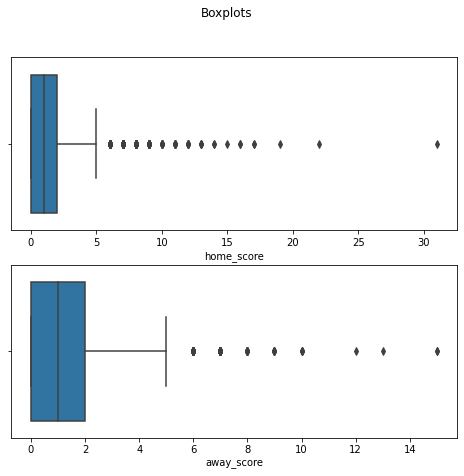

In [34]:
# checking for outliers


Scores = ['home_score','away_score']

fig, ax = plt.subplots(len(Scores), figsize=(8,7))
fig.suptitle('Boxplots')

for i,col_val in enumerate(Scores):
    sns.boxplot(final_df[col_val],ax=ax[i])

plt.show

In [ ]:
# encoding the tournament column


In [36]:
## Converting the tournament columns to: World cup, Friendly and others
def tournament(games):
    if (games == 'FIFA World Cup qualification') or (games == 'FIFA World Cup'):
        return 'World_Cup'
    if games == 'Friendly':
        return 'Friendly'
    else:
        return 'Other Matches'


final_df['tournament_type'] = final_df['tournament'].apply(lambda w: tournament(w))
final_df['tournament_type'].unique()

array(['Friendly', 'World_Cup', 'Other Matches'], dtype=object)

In [38]:
#dropping the tournament column
final_df.drop(['tournament'], axis = 1, inplace=True)
final_df

,awayteam_rank,country,rank_date_x,hometeam_rank,rank_date_y,home_team,away_team,home_score,away_score,month,year,tournament_type
0,3,Switzerland,1993-08-08,4,1993-08-08,Sweden,Switzerland,1,2,8,1993,Friendly
1,5,Argentina,1993-08-08,19,1993-08-08,Colombia,Argentina,2,1,8,1993,World_Cup
2,5,Argentina,1993-08-08,67,1993-08-08,Paraguay,Argentina,1,3,8,1993,World_Cup
3,5,Argentina,1993-08-08,70,1993-08-08,Peru,Argentina,0,1,8,1993,World_Cup
4,8,Brazil,1993-08-08,22,1993-08-08,Uruguay,Brazil,1,1,8,1993,World_Cup
...,...,...,...,...,...,...,...,...,...,...,...,...
12042,113,Sudan,2011-12-21,120,2011-12-21,Kenya,Sudan,0,1,12,2011,Other Matches
12043,113,Sudan,2011-12-21,137,2011-12-21,Tanzania,Sudan,0,1,12,2011,Other Matches
12044,113,Sudan,2011-12-21,140,2011-12-21,Burundi,Sudan,0,2,12,2011,Other Matches
12045,121,Namibia,2011-12-21,83,2011-12-21,Angola,Namibia,0,0,12,2011,Friendly


**6.Explaratory Data analysis**

**a) Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


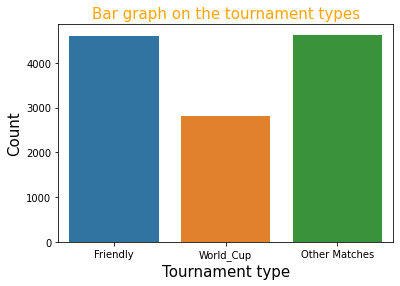

In [39]:
# bar graph on the tournament types played
sns.countplot('tournament_type',data = final_df)
plt.xlabel("Tournament type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Bar graph on the tournament types",fontsize=15,color='orange')
plt.show()

# the most played games from our dataset were the friendly matches and the other matches

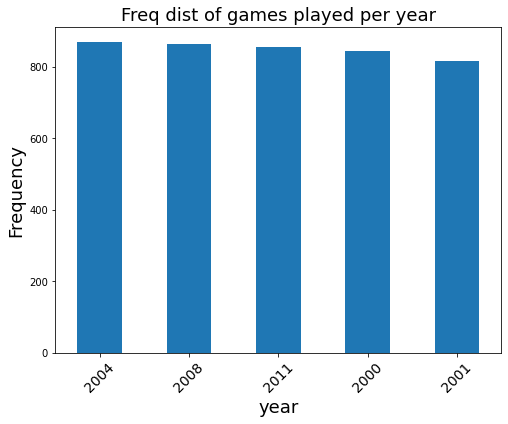

In [40]:
#Checking the top 5  years with most games played and ranked
#
#Bar plot on year

final_df['year'].value_counts().head(5).plot.bar(figsize=(8,6))

plt.title('Freq dist of games played per year',size=18)
plt.xlabel('year',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()

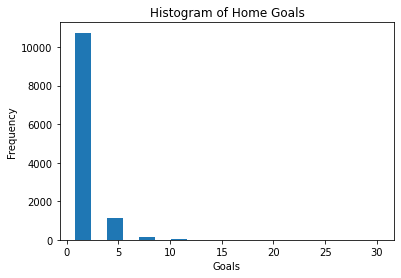

In [47]:

# Histogram on home team scores



goals = final_df['home_score']

plt.hist(goals, histtype='bar', rwidth=0.5)
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Histogram of Home Goals')
plt.show()


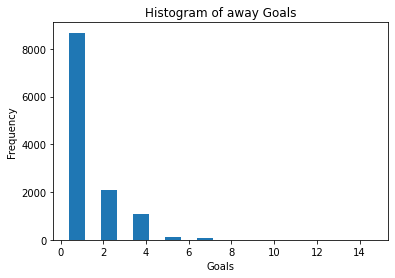

In [46]:

# Histogram on away scores



goals = final_df['away_score']

plt.hist(goals, histtype='bar', rwidth=0.5)
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Histogram of away Goals')
plt.show()

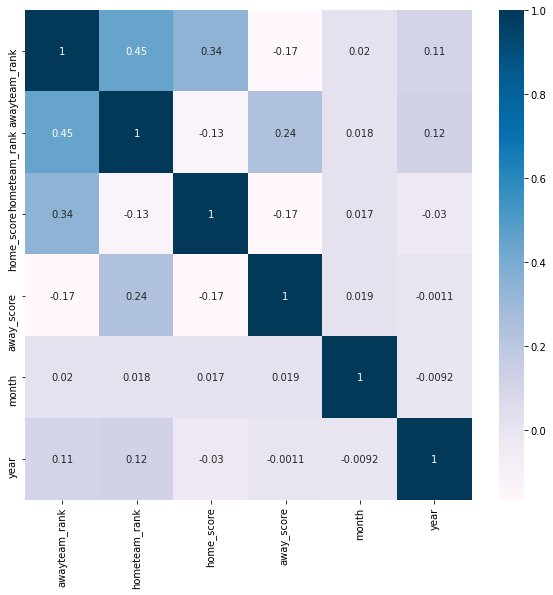

In [48]:
plt.figure(figsize =(10,9))
sns.heatmap(final_df.corr(), cmap= "PuBu", annot = True)
plt.show()

**checking for multi collinearity**

In [50]:
# Remove the serial and admit chance columns, we want to focus on our independent variables only.

independent_only = final_df.drop(columns=['home_team', 'away_team','tournament_type', 'country', 'month', 'year'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,awayteam_rank,hometeam_rank,home_score,away_score
awayteam_rank,1.000000,0.445099,0.342477,-0.166099
hometeam_rank,0.445099,1.000000,-0.129623,0.239808
home_score,0.342477,-0.129623,1.000000,-0.166343
away_score,-0.166099,0.239808,-0.166343,1.000000


Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the inverse of the matrix above.

In [51]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

#Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal.
# awayteam rank  has a score of 1.70, hometeam rank has a score of 1.58, home score has a score of 1.27, etc.


,awayteam_rank,hometeam_rank,home_score,away_score
awayteam_rank,1.701623,-0.936203,-0.637398,0.401120
hometeam_rank,-0.936203,1.585505,0.449471,-0.460952
home_score,-0.637398,0.449471,1.276332,-0.001349
away_score,0.401120,-0.460952,-0.001349,1.176941


**Polynomial Regression Approach**

In [52]:
final_df.drop(['month', 'year'], axis = 1, inplace=True)
final_df

,awayteam_rank,country,rank_date_x,hometeam_rank,rank_date_y,home_team,away_team,home_score,away_score,tournament_type
0,3,Switzerland,1993-08-08,4,1993-08-08,Sweden,Switzerland,1,2,Friendly
1,5,Argentina,1993-08-08,19,1993-08-08,Colombia,Argentina,2,1,World_Cup
2,5,Argentina,1993-08-08,67,1993-08-08,Paraguay,Argentina,1,3,World_Cup
3,5,Argentina,1993-08-08,70,1993-08-08,Peru,Argentina,0,1,World_Cup
4,8,Brazil,1993-08-08,22,1993-08-08,Uruguay,Brazil,1,1,World_Cup
...,...,...,...,...,...,...,...,...,...,...
12042,113,Sudan,2011-12-21,120,2011-12-21,Kenya,Sudan,0,1,Other Matches
12043,113,Sudan,2011-12-21,137,2011-12-21,Tanzania,Sudan,0,1,Other Matches
12044,113,Sudan,2011-12-21,140,2011-12-21,Burundi,Sudan,0,2,Other Matches
12045,121,Namibia,2011-12-21,83,2011-12-21,Angola,Namibia,0,0,Friendly


In [53]:
final_df.drop(['rank_date_x', 'rank_date_y'], axis = 1, inplace=True)
final_df

,awayteam_rank,country,hometeam_rank,home_team,away_team,home_score,away_score,tournament_type
0,3,Switzerland,4,Sweden,Switzerland,1,2,Friendly
1,5,Argentina,19,Colombia,Argentina,2,1,World_Cup
2,5,Argentina,67,Paraguay,Argentina,1,3,World_Cup
3,5,Argentina,70,Peru,Argentina,0,1,World_Cup
4,8,Brazil,22,Uruguay,Brazil,1,1,World_Cup
...,...,...,...,...,...,...,...,...
12042,113,Sudan,120,Kenya,Sudan,0,1,Other Matches
12043,113,Sudan,137,Tanzania,Sudan,0,1,Other Matches
12044,113,Sudan,140,Burundi,Sudan,0,2,Other Matches
12045,121,Namibia,83,Angola,Namibia,0,0,Friendly


In [54]:
poly_reg_dataset =  final_df.groupby(['hometeam_rank']).mean()
poly_reg_dataset.head()

,awayteam_rank,home_score,away_score
hometeam_rank,,,
1,36.681416,2.460177,0.584071
2,44.829060,2.136752,0.572650
3,41.520408,2.193878,0.806122
4,43.981651,2.045872,0.715596
5,40.600000,1.904000,0.640000


In [55]:
X = poly_reg_dataset.index.values.reshape(-1,1)
y = poly_reg_dataset['home_score'].values.reshape(-1,1)

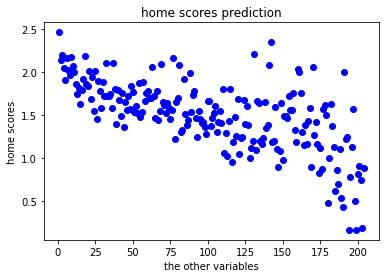

In [56]:
# plotting the scatter plot for polynomial regression
plt.scatter(X, y, color='blue') 
plt.title('home scores prediction')
plt.xlabel('the other variables')
plt.ylabel('home scores')
plt.show()

In [ ]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Home scores prediction(Linear Regression)')
plt.xlabel('other variables')
plt.ylabel('home scores')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('home scores prediction(Polynomial Regression)')
plt.xlabel('other variables')
plt.ylabel('home scores')
plt.show()

# pol_reg.predict(poly_reg.fit_transform([[5.5]]))

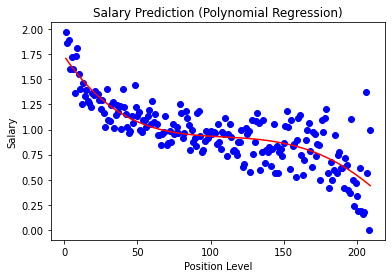

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
 # Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))


Linear prediction: 1
Polynomial prediction: 2


In [ ]:
poly_reg_dataset =  final_df.groupby(['awayteam_rank']).mean()
poly_reg_dataset.head()

,hometeam_rank,home_score,away_score
awayteam_rank,,,
1,38.534591,0.880503,1.968553
2,42.816327,0.775510,1.857143
3,46.290076,0.946565,1.893130
4,43.014493,0.818841,1.601449
5,37.322835,1.141732,1.724409


In [ ]:
X = poly_reg_dataset.index.values.reshape(-1,1)
y = poly_reg_dataset['away_score'].values.reshape(-1,1)

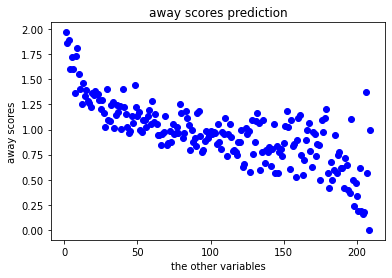

In [ ]:
plt.scatter(X, y, color='blue') 
plt.title('away scores prediction')
plt.xlabel('the other variables')
plt.ylabel('away scores')
plt.show()

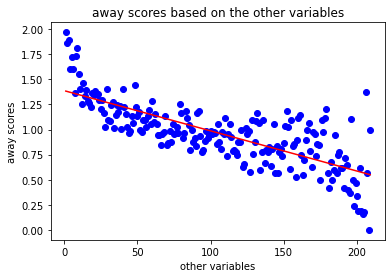

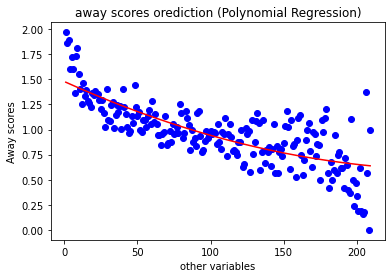

In [ ]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('away scores based on the other variables')
plt.xlabel('other variables')
plt.ylabel('away scores')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('away scores orediction (Polynomial Regression)')
plt.xlabel('other variables')
plt.ylabel('Away scores')
plt.show()

# pol_reg.predict(poly_reg.fit_transform([[5.5]]))

**Optimizing the polynomial regression model**

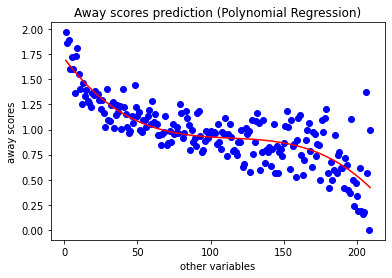

In [ ]:
 #Fit polynomial Regression to the dataset
poly_reg_3 = PolynomialFeatures(degree = 3) 
X_poly = poly_reg_3.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Away scores prediction (Polynomial Regression)')
plt.xlabel('other variables')
plt.ylabel('away scores')
plt.show()

In [ ]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_3.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

Linear prediction: 1
Polynomial prediction: 1


**Logistic regression approach in predicting the results**

In [62]:
# adding a status column
#First creating a list of our conditions
conditions = [
    (final_df['home_score'] > final_df['away_score']),
    (final_df['home_score'] < final_df['away_score']),
    (final_df['home_score'] == final_df['away_score']),
    ]

# create a list of the values we want to assign for each condition
values = ['Win','Lose','Draw']

# create a new column and use np.select to assign values to it using our lists as arguments
final_df['Status'] = np.select(conditions, values)


#Cross-checking our data to see if status column has been update
final_df.head()


,awayteam_rank,country,hometeam_rank,home_team,away_team,home_score,away_score,tournament_type,Status
0,3,Switzerland,4,Sweden,Switzerland,1,2,Friendly,Lose
1,5,Argentina,19,Colombia,Argentina,2,1,World_Cup,Win
2,5,Argentina,67,Paraguay,Argentina,1,3,World_Cup,Lose
3,5,Argentina,70,Peru,Argentina,0,1,World_Cup,Lose
4,8,Brazil,22,Uruguay,Brazil,1,1,World_Cup,Draw


In [87]:
#Encoding the status column of either a win,lose or draw using label encoding

#First importing  labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

In [88]:
# apply le on categorical feature Status column

final_df['match_status']=  le.fit_transform(final_df['Status'])
final_df.head()

,awayteam_rank,country,hometeam_rank,home_team,away_team,home_score,away_score,tournament_type,Status,match_status,World_Cup
0,3,Switzerland,4,Sweden,Switzerland,1,2,Friendly,Lose,1,0
1,5,Argentina,19,Colombia,Argentina,2,1,World_Cup,Win,2,1
2,5,Argentina,67,Paraguay,Argentina,1,3,World_Cup,Lose,1,1
3,5,Argentina,70,Peru,Argentina,0,1,World_Cup,Lose,1,1
4,8,Brazil,22,Uruguay,Brazil,1,1,World_Cup,Draw,0,1


In [69]:
final_df.drop(['Status_transform','match status'], axis=1, inplace= True)

In [93]:
# Splitting our dataset and performing data preprocessing
#
X = final_df[['home_score','hometeam_rank','World_Cup']].values
y = final_df['match_status'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [94]:
#Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:

# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
#Checking accuracy of the model 

LogReg.score(X_test, y_test)

# our  model is 65% accurate in predicting the results

0.6556016597510373

In [98]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)
y_pred

array([2, 1, 1, ..., 1, 0, 0])

In [99]:
# Evaluating the model
#Creating confusion matrix
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# from our confusion matrix we have 250 true positive results and 1350 negative prediction at 65.56% accuracy 


array([[ 250,  432,  198],
       [ 173,  770,   89],
       [ 271,   82, 1350]])

In [100]:
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

# Measuring the accuracy of the model
print("The accuracy of the model is", {accuracy_score(y_test, y_pred)})
print("The f1 score of the model is", {f1_score(y_test, y_pred, average = "macro")})

The accuracy of the model is {0.6556016597510373}
The f1 score of the model is {0.5969949307022454}


In [84]:
#encoding the tournament type data
#Encoding our dataset on tournament columns

# Get dummies

Tournament = pd.get_dummies(final_df['tournament_type'], prefix_sep='_', drop_first=True)
Tournament.head()


,Other Matches,World_Cup
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1


In [91]:
#Merging the final dataset and match columns
#

final_df = pd.concat([final_df, Tournament['Other Matches']],axis=1)
final_df.head()

,awayteam_rank,country,hometeam_rank,home_team,away_team,home_score,away_score,tournament_type,Status,match_status,World_Cup,Other Matches
0,3,Switzerland,4,Sweden,Switzerland,1,2,Friendly,Lose,1,0,0
1,5,Argentina,19,Colombia,Argentina,2,1,World_Cup,Win,2,1,0
2,5,Argentina,67,Paraguay,Argentina,1,3,World_Cup,Lose,1,1,0
3,5,Argentina,70,Peru,Argentina,0,1,World_Cup,Lose,1,1,0
4,8,Brazil,22,Uruguay,Brazil,1,1,World_Cup,Draw,0,1,0


**Cross Validation**

In [106]:
# We will use 4 independent variables for this
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = final_df[['home_score', 'away_score', 'awayteam_rank', 'hometeam_rank']].values
y = final_df['match_status'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5657896660831091
Mean Squared Error: 0.46703636214995226
Root Mean Squared Error: 0.6834005868814808


the RMSE is 68.34% . lets now validate our model using k-folds

In [107]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = final_df[['home_score', 'away_score', 'awayteam_rank', 'hometeam_rank']].values
y = final_df['match_status'].values


folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.6809771423637448

Training model 2
Model 2 Root Mean Squared Error: 0.7127516953277646

Training model 3
Model 3 Root Mean Squared Error: 0.6866889778167277

Training model 4
Model 4 Root Mean Squared Error: 0.6710537734774619

Training model 5
Model 5 Root Mean Squared Error: 0.670846580048223


**Follow up questions**

** a). Did we have the right data?**

Yes we did.


**b). Do we need other data to answer our question?**


yes a more refined data set because on merging a lot of data is lost


**c). Did we have the right question?**


Yes 



**Conclusions**


the data set used was good for the analysis needed and reaching our goal at a 65% accuracy level